In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

# Estableciendo la acción que queremos simular
stock = 'TSLA'
endDate = dt.datetime.now()  # define hoy como fecha de fin
startDate = endDate - dt.timedelta(days=365 * 3)  # Toma datos de hace 3 años


In [2]:

# Baja los precios de cierre de la acción:
stockData = yf.download(stock, start=startDate, end=endDate, progress=False)['Adj Close']
stockData

Date
2021-02-02    290.929993
2021-02-03    284.896667
2021-02-04    283.329987
2021-02-05    284.076660
2021-02-08    287.806671
                 ...    
2024-01-26    183.250000
2024-01-29    190.929993
2024-01-30    191.589996
2024-01-31    187.289993
2024-02-01    188.860001
Name: Adj Close, Length: 755, dtype: float64

In [3]:
# Calcula los rendimientos
returns = stockData.pct_change().dropna()
returns

Date
2021-02-03   -0.020738
2021-02-04   -0.005499
2021-02-05    0.002635
2021-02-08    0.013130
2021-02-09   -0.016168
                ...   
2024-01-26    0.003395
2024-01-29    0.041910
2024-01-30    0.003457
2024-01-31   -0.022444
2024-02-01    0.008383
Name: Adj Close, Length: 754, dtype: float64

In [4]:

# Calcula el rendimiento medio
meanReturn = returns.mean()
# Calcula la varianza de los rendimientos
variance = returns.var()
# Regresa lo que estimamos
meanReturn

0.0001057365105992728

In [5]:
variance

0.0013585370258216798

In [6]:
# Estableciendo parámetros de simulación
np.random.seed(123)
T = 30
mc_sims = 400
CapitalInicial = 10000

In [7]:

# Simulando los rendimientos diarios para la acción
daily_sims = np.full(shape=(T,mc_sims), fill_value=0.0)
daily_sims

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:

for m in range(mc_sims):
    Z = np.random.normal(size=T)
    dailyReturns = meanReturn + np.sqrt(variance) * Z
    daily_sims[:,m] = np.cumprod(dailyReturns + 1) * CapitalInicial
daily_sims[:,0]

array([ 9600.91197591,  9954.86141797, 10059.74437879,  9502.29589607,
        9300.65236218,  9867.75909461,  8986.19692836,  8845.08425334,
        9258.7338358 ,  8963.92766245,  8740.57456843,  8710.98703643,
        9190.75229868,  8975.29230913,  8829.3657214 ,  8688.9458791 ,
        9396.33600168, 10154.68642682, 10531.56231765, 10682.58413202,
       10974.04686194, 11578.18614323, 11180.04075972, 11665.7558418 ,
       11127.84527312, 10867.44564321, 11231.94113668, 10641.66827615,
       10587.85374685, 10252.67283175])

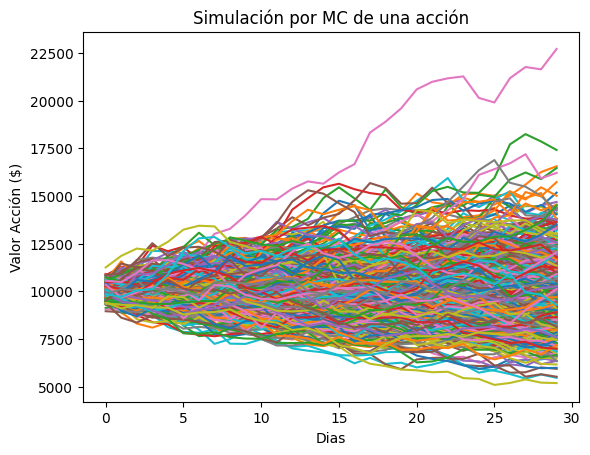

In [9]:

# Funciones de gráfica
def plotSims_single(daily_sims):
    plt.plot(daily_sims)
    plt.ylabel('Valor Acción ($)')
    plt.xlabel('Dias')
    plt.title('Simulación por MC de una acción')
    plt.show()
plotSims_single(daily_sims)


## Actividad en Clase

Crear un histograma con los precios de la acción al final del periodo

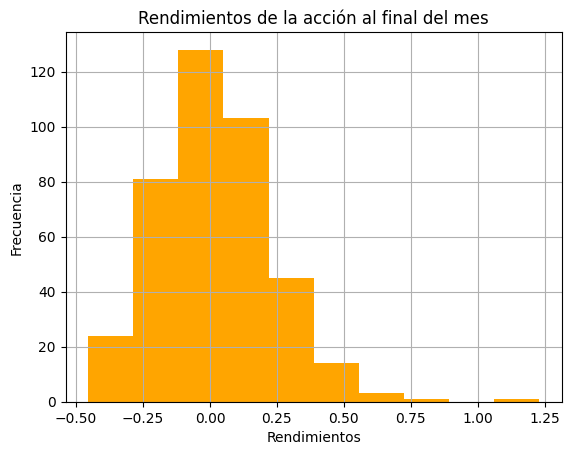

In [38]:
pp = (daily_sims[-1]/daily_sims[0])-1
plt.figure()
plt.hist(pp, color = 'orange', histtype='stepfilled')
plt.grid()
plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.title("Rendimientos de la acción al final del mes")
plt.show()

La gráfica está ligeramente sesgada a la derecha, significa que las simulaciones arrojaron resultados más "negativos" (rendimiento negativo) que positivos. 

También vemos que la cola es pesada hacia el lado positivo del eje x y su media de rendimientos parece ser menor a cero, se tendría que obtener el valor esperado y la varianza de las simulaciones para confirmar las asumciones que estamos haciendo.